# Задание 2

1. Согласно варианта найти выбросы в экспертных оценках по приведенным в п.1 методам:
- CI для укороченной МПС,
- Корреляции между строками и столбцами МПС,
- Хи-квадрат.
Сравнить полученные результаты.
2. Согласно варианта выполнить автоматическую корректировку 
согласованности экспертных оценок по методам WGММ и WАММ, 
использовать различные значения alpha: 0.5, 0.6, 0.7, 0.8, 0.9. 
3. Согласно варианта рассчитать согласованные веса альтернатив по методу «треугольник».

Матрица по варианту:
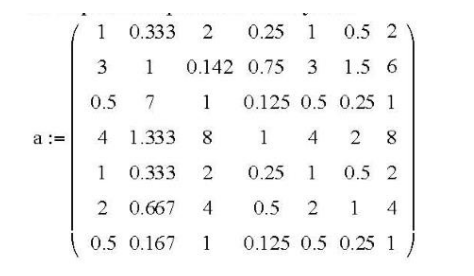

In [1]:
# импорт необходимых зависимостей
import numpy as np
import statistics
import math
import scipy
from scipy.stats import chi2_contingency

In [2]:
# функция, вычисляющая индекс согласованности
def calculate_ci(matrix):
    l, v = np.linalg.eig(matrix)
    lmax = np.max(l)
    lmax = (lmax, lmax.real)[bool(lmax.imag == 0j)]
    n = np.shape(matrix)[0]
    ci = (lmax - n) / (n - 1)
    return ci

In [3]:
# инициализация матрицы по варианту
a_matrix = np.array([
        [1, 0.333, 2, 0.25, 1, 0.5, 2],
        [3, 1, 0.142, 0.75, 3, 1.5, 6],
        [0.5, 7, 1, 0.125, 0.5, 0.25, 1],
        [4, 1.333, 8, 1, 4, 2, 8],
        [1, 0.333, 2, 0.25, 1, 0.5, 2],
        [2, 0.667, 4, 0.5, 2, 1, 4],
        [0.5, 0.167, 1, 0.125, 0.5, 0.25, 1]
    ])

#### Поиск выброса методом CI для укороченной матрицы:

In [4]:
# вычисление индекса согласованности исходной матрицы
a_ci = calculate_ci(a_matrix)
a_ci

0.38483646846939684

In [5]:
# вычисление отношения согласованности исходной матрицы
a_mrci = 1.35 # константное значение для n = 7
a_cr = a_ci / a_mrci
a_cr

0.2850640507180717

In [6]:
# поиск индексов согласованности для матриц, полученных вычеркиванием i-х строки и столбца из исходной
a_n = np.shape(a_matrix)[0]
a_consistency_indexes = []
for i in range(a_n):
    temp_matrix = np.delete(a_matrix, i, 0)
    temp_matrix = np.delete(temp_matrix, i, 1)
    temp_ci = calculate_ci(temp_matrix)
    a_consistency_indexes.append(temp_ci)
a_consistency_indexes

[0.46303835556142303,
 0.0,
 8.333275463456857e-06,
 0.46302812951259076,
 0.4630383555614248,
 0.4630179034222085,
 0.46299745111679763]

In [7]:
# поиск индексов 2-х минимальных элементов полученного массива
lowest_indexes = np.argsort(a_consistency_indexes)[:2]
lowest_indexes

array([1, 2], dtype=int64)

In [8]:
# определение выброса в матрице
lower_row_index = lowest_indexes[0]
lower_col_index = lowest_indexes[1]
outlier_element = a_matrix[lower_row_index][lower_col_index]
print(f"Выброс матрицы - {outlier_element} (элемент d{lower_row_index}{lower_col_index})")

Выброс матрицы - 0.142 (элемент d12)


#### Поиск выброса методом корреляции между строками и столбцами МПС:

In [9]:
# вычисление математических ожиданий коэффициентов корреляции между i-й и всеми другими строками МПС
row_correlations = []
for row in a_matrix:
    row_correlations.append(np.var(np.corrcoef(row, a_matrix)))
row_correlations

[0.2636102018250233,
 0.24106473112666,
 0.33417733240039943,
 0.2636040016097183,
 0.2636102018250233,
 0.26359779974637804,
 0.2635853910754984]

In [10]:
# вычисление математических ожиданий коэффициентов корреляции между i-м и всеми другими столбцами МПС
col_correlations = []
col_matrix = np.transpose(a_matrix)
for row in col_matrix:
    col_correlations.append(np.var(np.corrcoef(row, col_matrix)))
col_correlations

[0.23977479894989312,
 0.31710135669589046,
 0.22014515431067316,
 0.23977479894989312,
 0.23977479894989312,
 0.23977479894989312,
 0.23977479894989312]

In [11]:
# определение выброса в матрице
minimal_row_correlation_index = np.array(row_correlations).argmin()
minimal_col_correlation_index = np.array(col_correlations).argmin()
outlier_element = a_matrix[minimal_row_correlation_index][minimal_col_correlation_index]
print(f"Выброс матрицы - {outlier_element} (элемент d{minimal_row_correlation_index}{minimal_col_correlation_index})")

Выброс матрицы - 0.142 (элемент d12)


#### Поиск выброса с помощью критерия Хи-квадрат:

In [12]:
# поиск теоретической матрицы для заданной МПС
expected = chi2_contingency(a_matrix)[3]
expected

array([[0.98861297, 0.89247036, 1.49461804, 0.24715324, 0.98861297,
        0.49430648, 1.97722594],
       [2.14834545, 1.93941885, 3.24794026, 0.53708636, 2.14834545,
        1.07417272, 4.2966909 ],
       [1.44809538, 1.3072681 , 2.18927886, 0.36202384, 1.44809538,
        0.72404769, 2.89619075],
       [3.95459145, 3.57000743, 5.97868318, 0.98864786, 3.95459145,
        1.97729573, 7.9091829 ],
       [0.98861297, 0.89247036, 1.49461804, 0.24715324, 0.98861297,
        0.49430648, 1.97722594],
       [1.97736551, 1.78506672, 2.9894471 , 0.49434138, 1.97736551,
        0.98868276, 3.95473103],
       [0.49437627, 0.44629818, 0.74741453, 0.12359407, 0.49437627,
        0.24718814, 0.98875254]])

In [13]:
# поиск матрицы отклонений
deltas = (a_matrix - expected) / expected
deltas

array([[ 0.01151819, -0.62687836,  0.33813452,  0.01151819,  0.01151819,
         0.01151819,  0.01151819],
       [ 0.39642347, -0.48438162, -0.95627998,  0.39642347,  0.39642347,
         0.39642347,  0.39642347],
       [-0.65471888,  4.3546782 , -0.54322859, -0.65471888, -0.65471888,
        -0.65471888, -0.65471888],
       [ 0.01148249, -0.62661142,  0.3380873 ,  0.01148249,  0.01148249,
         0.01148249,  0.01148249],
       [ 0.01151819, -0.62687836,  0.33813452,  0.01151819,  0.01151819,
         0.01151819,  0.01151819],
       [ 0.01144679, -0.6263445 ,  0.33804007,  0.01144679,  0.01144679,
         0.01144679,  0.01144679],
       [ 0.0113754 , -0.62581071,  0.33794563,  0.0113754 ,  0.0113754 ,
         0.0113754 ,  0.0113754 ]])

In [14]:
# определение доверительного интервала для матрицы отклонений (с доверительной точностью 99%)
deltas_mean = deltas.mean()
deltas_var = deltas.var()
deltas_std = deltas.std()
accuracy = 0.99
interval = scipy.stats.t.interval(accuracy, a_matrix.size - 1, loc=deltas_mean, scale=deltas_std)
interval

(-1.9506016623360822, 1.9474928837650451)

In [15]:
# зачеркиваем все значения, находящиеся внутри доверительного интервала
masked_deltas = np.ma.masked_inside(deltas, interval[0], interval[1])
masked_deltas

masked_array(
  data=[[--, --, --, --, --, --, --],
        [--, --, --, --, --, --, --],
        [--, 4.35467819769802, --, --, --, --, --],
        [--, --, --, --, --, --, --],
        [--, --, --, --, --, --, --],
        [--, --, --, --, --, --, --],
        [--, --, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True],
        [ True, False,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True]],
  fill_value=1e+20)

In [16]:
# определение выброса в матрице
masked_deltas = masked_deltas.mask
indexes = np.where(masked_deltas == False)
row_index = indexes[0][0]
col_index = indexes[1][0]
outlier_element = a_matrix[row_index][col_index]
print(f"Выброс матрицы - {outlier_element} (элемент d{row_index}{col_index})")

Выброс матрицы - 7.0 (элемент d21)


#### Автоматическая корректировка согласованности экспертных оценок по методу WАММ (при использовании WGMM происходит ошибка вычисления корня из отрицательного числа)

In [17]:
# функция, возвращающая индекс согласованности и вектор весов, полученные методом EM
def calculate_ci_and_weights(matrix):
    l, v = np.linalg.eig(matrix)
    lmax = np.max(l)
    vmax = v[np.where(l == lmax)]
    vmax = vmax.real
    lmax = (lmax, lmax.real)[bool(lmax.imag == 0j)]
    n = np.shape(matrix)[0]
    ci = (lmax - n) / (n - 1)
    return ci, vmax[0]

In [18]:
# вычисление исходных весов и отношения согласованности
current_ci, current_weights = calculate_ci_and_weights(a_matrix)
current_cr = current_ci / a_mrci
current_cr

0.2850640507180717

In [19]:
# инициализация рассматриваемых коэффицентов alpha и создание копии исследуемой матрицы
alphas = [0.5, 0.6, 0.7, 0.8, 0.9]
a_matrix_copy = np.copy(a_matrix)

In [20]:
# отображение результатов корректировки МПС для разных alpha:
for alpha in alphas:
    temp_cr = current_cr
    step = 0
    print(f"alpha = {alpha}")
    while temp_cr > 0.1:
        step += 1
        for i in range(a_n):
            for j in range(a_n):
                if i > j:
                    a_matrix_copy[i][j] = 1 / (alpha * a_matrix_copy[i][j] + (1 - alpha) * (current_weights[i] / current_weights[j]))
                else:
                    a_matrix_copy[i][j] = alpha * a_matrix_copy[i][j] + (1 - alpha) * (current_weights[i] / current_weights[j])
        temp_ci, current_weights = calculate_ci_and_weights(a_matrix_copy)
        temp_cr = temp_ci / a_mrci
        delta = np.max(a_matrix_copy - a_matrix)
        sigma = math.sqrt(np.sum(np.power(a_matrix_copy - a_matrix, 2))) / a_n
        print(f"k = {step}\t|\tDk = {a_matrix_copy}\t|\tCR = {temp_cr}\t|\twk = {current_weights}\t|\tdelta = {delta}, sigma = {sigma}\n")

alpha = 0.5
k = 1	|	Dk = [[  1.           0.79811013   1.63161013  10.21356181   0.35936433
   -2.36146416  -1.61146416]
 [  0.52747796   1.           0.571        8.3613838    1.38866893
   -1.31730706   0.93269294]
 [  1.54843395   0.25         1.           8.0488838    0.13866893
   -1.94230706  -1.56730706]
 [  0.49388069   1.43306865   0.24805874   1.           1.99302994
    0.87057302   3.87057302]
 [ -0.78269129  -0.48098785  -0.80285523  -0.02797772   1.
    9.53450165  10.28450165]
 [  1.10586652   4.70433866   0.53217823  -0.59467489   0.97377944
    1.           2.5       ]
 [  6.48221468 -26.71634514   2.63803707  -0.5350194    3.61106526
    1.6          1.        ]]	|	CR = (-0.03744555490614784+0.9109695243009523j)	|	wk = [ 0.31801745  0.31801745 -0.35739612 -0.35739612 -0.53997216 -0.47866699
  0.04305727]	|	delta = 9.963561807242696, sigma = 5.357072561199222

alpha = 0.6
k = 1	|	Dk = [[ 1.00000000e+00  8.78866078e-01  6.23038936e-01  5.77220994e+00
  -1.99620284e-02 -

#### Рассчет согласованных весов альтернатив по методу «треугольник»

In [21]:
# начальная инициализация вектора весов и копирование МПС
triangle_weights = np.ones(a_n)
matrix = np.copy(a_matrix)

In [22]:
# вычисляем согласованные нормированные агрегированные веса альтернатив
for i in range(a_n - 1):
    # выбираем эталонный элемент, как индекс минимального элемента в векторе весов 
    pivot_index = np.argmin(triangle_weights)
    # вычисляем вектор коэффициентов альтернатив
    priorities = np.zeros(a_n)
    for j in range(a_n):
        if j != pivot_index:
            # предотвращаем деление на 0
            if matrix[j, pivot_index] == 0:
                priorities[j] = 0
            else:
                priorities[j] = (matrix[pivot_index, j] / matrix[j, pivot_index]) * triangle_weights[j]
    # вычисляем спектральный коэффициент согласованности
    concordance_coefficient = np.sum(priorities) / (a_n - 1)
    # вычисляем индекс согласованности
    ci = (concordance_coefficient - a_n) / (a_n - 1)
    # константное значение для матрицы размерностью 7х7
    mrci = 1.35
    # вычисляем отношение согласованности (корректировка весов и пересчет спектрального коэффициента необходимы, 
    # когда модуль данного отношения <=0.1)
    cr = ci / mrci
    if math.fabs(cr) > 0.1:
        triangle_weights[pivot_index] = np.sum(priorities) / np.sum(priorities) + triangle_weights[pivot_index]
        concordance_coefficient = np.sum(priorities) + triangle_weights[pivot_index] * a_n
        ci = (concordance_coefficient - a_n) / (a_n - 1)
    # нормируем веса и обновляем матрицу экспертных оценок
    triangle_weights = triangle_weights / np.sum(triangle_weights)
    matrix = matrix - (triangle_weights[:, None] * triangle_weights) * matrix[pivot_index, :]
    matrix = matrix - (triangle_weights[None, :] * triangle_weights) * matrix[:, pivot_index, None]
    matrix[pivot_index, :] = np.zeros(a_n)
    matrix[:, pivot_index] = np.zeros(a_n)

In [23]:
# вывод вектора нормированных агрегированных весов альтернатив, полученных методом "треугольник"
triangle_weights

array([0.015625 , 0.0703125, 0.1328125, 0.2578125, 0.5078125, 0.0078125,
       0.0078125])